#### 1. Importar un csv (2 puntos):
Importe el set de datos creados por usted al final de la sesión pasada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] =(8,6)
plt.rcParams["figure.dpi"] = 200

df = pd.read_csv('subsample_achv_demo.csv')
pd.set_option('display.float_format','{:.6}'.format) 
cods = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
nombres = ['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem',
            'EastAsia','SouthEastAsia','SouthAsia', 'Pacific', 'Caribbean' ]
df['ht_region'] = df['ht_region'].replace(cods, nombres)
df.head(10)

,Unnamed: 0,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,179,Tuvalu,NaN,TUV,Pacific,3174.05,0.011,NaN,NaN,NaN,69.805
1,63,Gambia,0.45,GMB,SubSaharian,1601.88,NaN,7.7,4.27658,2.76771,NaN
2,3,Andorra,0.857,AND,WesternDem,32367.3,NaN,NaN,NaN,2.99781,NaN
3,193,Zambia,0.576,ZMB,SubSaharian,1916.79,NaN,7.8,4.32884,NaN,NaN
4,127,Norway,0.948,NOR,WesternDem,57634.8,5.156,1.6,5.04826,7.37329,95.2019
5,38,Colombia,0.724,COL,LatAm,8761.14,47.662,6.7,3.40591,4.65941,78.5861
6,87,Jordan,0.741,JOR,NorthAfrica,5188.92,6.675,3.6,4.58532,NaN,81.3763
7,67,Greece,0.865,GRC,WesternDem,25295.3,10.927,3.8,2.99926,NaN,95.0674
8,12,Bangladesh,0.575,BGD,SouthAsia,1796.64,154.695,7.5,3.29315,1.95726,57.2399
9,165,Suriname,0.723,SUR,Caribbean,6049.15,0.547,7.3,2.88456,NaN,58.3923


#### 2. Importar su conjunto de funciones (2 puntos). Para ello deberás:
- Generar un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e importe.
- Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.

In [2]:
from ancilliary_funcs import get_null_cases

for c in df.columns:
    get_null_cases(df, c, False)
    print('-'*50)

Casos nulos para Unnamed: 0: 0.0000
Porcentaje nulos para Unnamed: 0: 0.0000
--------------------------------------------------
Casos nulos para cname: 0.0000
Porcentaje nulos para cname: 0.0000
--------------------------------------------------
Casos nulos para undp_hdi: 6.0000
Porcentaje nulos para undp_hdi: 0.0619
--------------------------------------------------
Casos nulos para ccodealp: 0.0000
Porcentaje nulos para ccodealp: 0.0000
--------------------------------------------------
Casos nulos para ht_region: 0.0000
Porcentaje nulos para ht_region: 0.0000
--------------------------------------------------
Casos nulos para gle_cgdpc: 1.0000
Porcentaje nulos para gle_cgdpc: 0.0103
--------------------------------------------------
Casos nulos para imf_pop: 20.0000
Porcentaje nulos para imf_pop: 0.2062
--------------------------------------------------
Casos nulos para ffp_hf: 12.0000
Porcentaje nulos para ffp_hf: 0.1237
--------------------------------------------------
Casos nulo

#### 3. Estimar el puntaje Z de una variable (2 puntos):
Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).
> Se elije la variable ***gle_cgdpc.*** (PIB per cápita) con 1 caso nulo.
- Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: 𝑧𝑖 = ( 𝑥𝑖 − 𝑥 ) / σ (𝑥)
- Para ordenar los valores pueden utilizar la función sort_values del DataFrame analizado. Lean la documentación asociada al argumento by.
- Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna. Lean la documentación asociada al argumento subset.
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada.
¿Qué características en común se encuentran?

In [3]:
#Se elije la variable gle_cgdpc (PIB per cápita) con 1 caso nulo.

dfz=df.dropna(subset=['gle_cgdpc']) #Se genera un nuevo DataFrame eliminando datos perdidos en la columna seleccionada 

media=df['gle_cgdpc'].mean()
std=df['gle_cgdpc'].std()
print(f"La media es: {round(media,3)} y la desv.std es: {round(std,3)} ")

dfz=dfz.assign(puntaje_Z=0) #Se agrega una nueva columna para el puntaje Z (Puntaje Z)

for i in range(len(dfz)):
    dfz.loc[i,'puntaje_Z']=(dfz.iloc[i,5]-media)/std

dfz_ord = dfz.sort_values(by=['puntaje_Z']).reset_index(drop=True)
dfz_ord

La media es: 14810.545 y la desv.std es: 19675.362 


,Unnamed: 0,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,puntaje_Z
0,116.0,Mozambique,0.414,MOZ,SubSaharian,852.39,25.733,7.4,2.77046,6.48322,19.44,-0.709423
1,139.0,Guinea-Bissau,0.421,GNB,SubSaharian,961.26,NaN,8.5,NaN,2.17313,NaN,-0.70389
2,154.0,Sierra Leone,0.431,SLE,SubSaharian,979.95,6.232,8.4,2.98609,2.66167,NaN,-0.70294
3,172.0,Togo,0.484,TGO,SubSaharian,1036.28,6.929,7.3,NaN,4.86846,NaN,-0.700077
4,106.0,Mali,0.438,MLI,SubSaharian,1063.26,14.854,8.4,3.00328,3.73929,34.6161,-0.698706
...,...,...,...,...,...,...,...,...,...,...,...,...
92,155.0,Singapore,0.924,SGP,SouthEastAsia,54268.1,5.47,3.3,5.79728,2.91579,NaN,2.00543
93,127.0,Norway,0.948,NOR,WesternDem,57634.8,5.156,1.6,5.04826,7.37329,95.2019,2.17654
94,91.0,Kuwait,0.799,KWT,NorthAfrica,64342.7,3.999,3.1,3.07577,NaN,83.5788,2.51747
95,141.0,Qatar,0.855,QAT,NorthAfrica,1.04049e+05,2.045,3.1,5.82052,3.60719,72.4646,4.53557


In [4]:
subdf=pd.concat([dfz_ord.head(10),dfz_ord.tail(10)],axis=0)
subdf

,Unnamed: 0,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,puntaje_Z
0,116.0,Mozambique,0.414,MOZ,SubSaharian,852.39,25.733,7.4,2.77046,6.48322,19.44,-0.709423
1,139.0,Guinea-Bissau,0.421,GNB,SubSaharian,961.26,NaN,8.5,NaN,2.17313,NaN,-0.70389
2,154.0,Sierra Leone,0.431,SLE,SubSaharian,979.95,6.232,8.4,2.98609,2.66167,NaN,-0.70294
3,172.0,Togo,0.484,TGO,SubSaharian,1036.28,6.929,7.3,NaN,4.86846,NaN,-0.700077
4,106.0,Mali,0.438,MLI,SubSaharian,1063.26,14.854,8.4,3.00328,3.73929,34.6161,-0.698706
5,187.0,Burkina Faso,0.399,BFA,SubSaharian,1095.96,16.5,6.9,2.86871,4.60476,26.4928,-0.697044
6,47.0,Benin,0.481,BEN,SubSaharian,1413.05,10.32,6.8,2.39394,4.32068,44.9698,-0.680927
7,185.0,Tanzania,0.519,TZA,SubSaharian,1416.3,43.88,7.0,3.00421,3.47914,NaN,-0.680762
8,159.0,Somalia,NaN,SOM,SubSaharian,1436.74,NaN,9.2,NaN,NaN,NaN,-0.679723
9,144.0,Rwanda,0.493,RWA,SubSaharian,1440.39,10.2,7.5,4.0376,3.79746,27.2392,-0.679538


>El valor del puntaje Z es proporcional a gle_cgdpc lo que indica un mayor PIB per cápita.

>Tambien el valor undp_hdi que es el índice de desarrollo humano aumenta con un mayor PIB per cápita.

#### 4. Estimar el puntaje z de las regiones (2 puntos).
Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
- Para ello realice un dotplot que muestre el valor promedio de su variable por cada región.
- Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar).

In [5]:
df_region= dfz_ord.groupby('ht_region')['gle_cgdpc'].mean()
df_region

ht_region
Caribbean       10440.8
EastAsia        20121.9
EastEurope      13514.0
LatAm           9119.71
NorthAfrica     29440.1
Pacific         2650.43
SouthAsia       3591.15
SouthEastAsia   14844.8
SubSaharian     3309.38
WesternDem      42475.1
Name: gle_cgdpc, dtype: float64

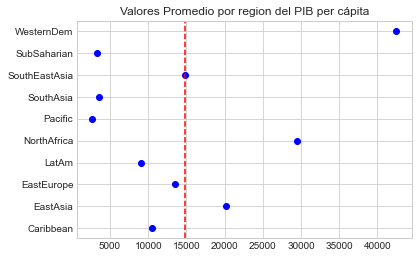

In [6]:
plt.title('Valores Promedio por region del PIB per cápita')
plt.plot(df_region.values,df_region.index, 'o', color = 'blue')
plt.axvline(media, color = 'red', linestyle='--')

#### 5. Generar curvas de Densidad de Probabilidad (2 puntos).
- Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables imf_pop, gle_cgdpc y wdi_exph.
- La función debe contener como argumentos:
    - df: Tabla de datos 1.
    - variable: Variable a contrastar.


Curva de Densidad de Probabilidad para imf_pop


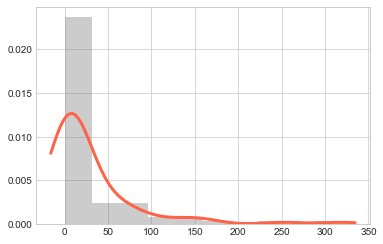

Curva de Densidad de Probabilidad para gle_cgdpc


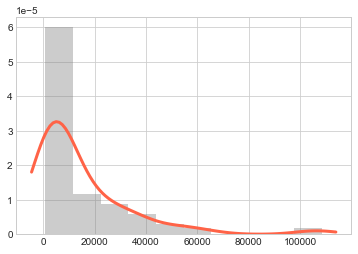

Curva de Densidad de Probabilidad para wdi_expedu


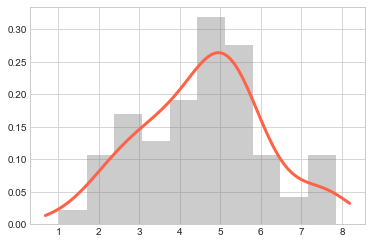

In [7]:
def cdp(array):
    plt.hist(array, color='grey', alpha=.4, density=True)
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 100)
    gauss_kde = stats.gaussian_kde(array) # Kernel gaussiano
    Z = np.reshape(gauss_kde(x_axis), x_axis.shape)
    plt.plot(x_axis, Z, color='tomato', lw=3)
    plt.show()

list_var= ['imf_pop','gle_cgdpc','wdi_expedu']

for i in list_var:
    print('Curva de Densidad de Probabilidad para',i)
    cdp(dfz_ord[i].dropna())

In [9]:

#Otra implementación:

def cdp(df,var):
    data = df[var]
    dens = data.plot.density()
    plt.show(dens)


#list_var= ['imf_pop','gle_cgdpc','wdi_expedu']

#for i in list_var:
#    print('Curva de Densidad de Probabilidad para',i)
#    cdp(dfz_ord,i)
